In [119]:
%matplotlib inline

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

# Creating Linear Regression Model

## Simple Linear Regression
The simpler linear regression is suitable for one input feature. The model is represented by the equation of a strait line. 

### Workflow
1. Generate training data by providing initial parameters a & b
2. Add noise to the training data
3. Define **linear regression algorithm**
4. Define **loss function**
5. Iterate over the training data to find parameters
6. Generate test data
7. Score the model on the test data

In [121]:
# defining parameters of the regression. These are initial parameters ONLY for generating data and comparing 
# calculated parameters
a_init = 4
b_init = 1
# generating training input data
x = np.linspace(0, 10, 1000)
y = a_init * x + b_init

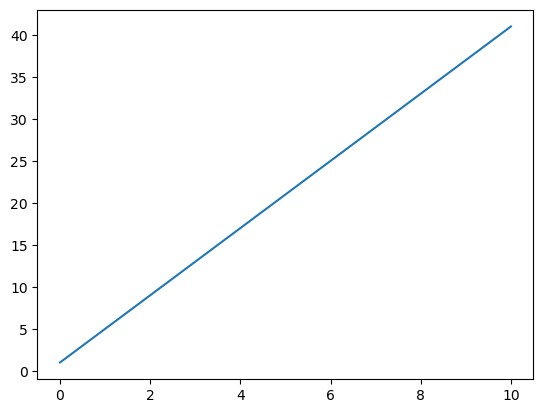

In [122]:
# plotting the line equation of the data
plt.plot(x, y)
plt.show()

In [123]:
# addinig noise to the output data
eps = np.random.randn(len(x))
y_noise = y + eps

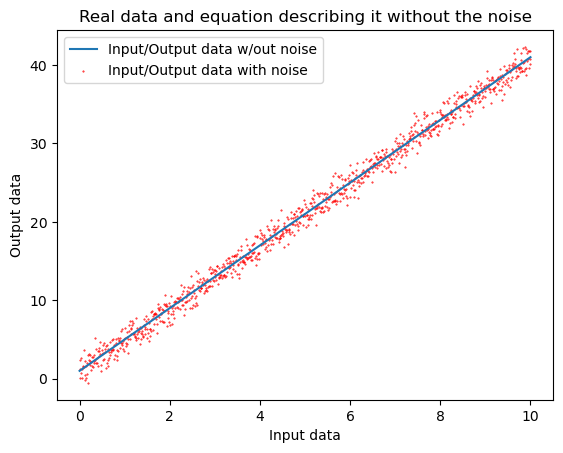

In [124]:
# plotting the line and the noised data
plt.plot(x, y, label='Input/Output data w/out noise')
plt.scatter(x, y_noise, c='r', s=0.2, label='Input/Output data with noise')
plt.xlabel('Input data')
plt.ylabel('Output data')
plt.title('Real data and equation describing it without the noise')
plt.legend()
plt.show()

What is clear on the plot is that the parameters $a = 4$ and $b = 1$, which were used to model the equation of the data, describe the noised data as best possible. Assuming we **ONLY** have $x$ and $y_noise$ and the parameters $a$ and $b$ are **unknown**, we will now create a linear regression model.

Defining the MSE:
$$J = \frac{1}{n}\sum_{i=1}^n(y_i-(ax_i+b))^2$$

This in python:
```python
def mean_squared_error(x, y, a, b):
    """
    The function calculates mean squared error
    
    :param x: float: original input data
    :param y: float: original output data with noise/variance included
    :param a: float: target parameter 'a'
    :param b: float: interceptor 'b'
    :return: mean squared error
    """

    return 1 / len(x) * np.sum(y - (a * x + b)) ** 2   
```

From that formula we get the gradient for the parameters:
$$\frac {\partial J}{\partial a} = -\frac{2}{n}\sum_{i=1}^nx_i(y_i - \tilde{y_i})$$
$$\frac {\partial J}{\partial b} = -\frac{2}{n}\sum_{i=1}^n(y_i - \tilde{y_i})$$

```python
a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(x) * np.sum(y - (a * x + b))
```

Finally, calculating the gradient descent is iterative operation. The result from each iteration is passed again to the next iteration of the calculation:
$$\theta_{new} = \theta_{old} - \alpha \cdot \nabla L(\theta)$$
```python
def gradient_descent(x, y, a, b, learning_rate):
    a_grad, b_grad = parameter_gradient(x, y, a, b)

    a_new = a - learning_rate * a_grad
    b_new = b - learning_rate * b_grad

    return a_new, b_new   
```
We set the starting value of the parameters, pass the learning rate and we calculate the final parameters.
```python
a = 80
b = 12
learning_rate = 0.02
for i in range(600):
    a, b = gradient_descent(x, y_noise, a , b, learning_rate)
```

In [125]:
def parameter_gradient(x, y, a, b):
    """ using MSE """

    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(x) * np.sum(y - (a * x + b))

    return a_gradient, b_gradient

In [126]:
def gradient_descent(x, y, a, b, learning_rate):
    a_grad, b_grad = parameter_gradient(x, y, a, b)

    a_new = a - learning_rate * a_grad
    b_new = b - learning_rate * b_grad

    return a_new, b_new

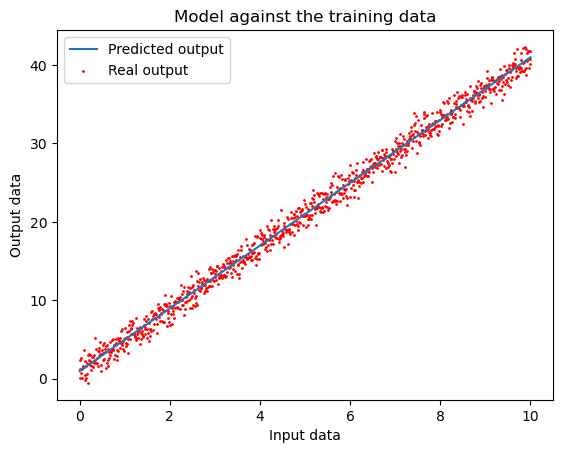

In [127]:
a = 80
b = 12
learning_rate = 0.02
for i in range(600):
    a, b = gradient_descent(x, y_noise, a, b, learning_rate)

coef = (a, b)

y_pred = a * x + b

plt.plot(x, y_pred, label='Predicted output')
plt.scatter(x, y_noise, c='r', s=1, label='Real output')
plt.xlabel('Input data')
plt.ylabel('Output data')
plt.title('Model against the training data')
plt.legend()
plt.show()

We can see that the model describes the data very accurate. We now generate test data

In [128]:
# Generate test data (new x values)
x_test = np.linspace(10, 15, 500)  # New range for test data

# Generate corresponding y values based on the same linear relationship (without noise)
y_test = a_init * x_test + b_init
# add noise
eps_test = np.random.randn(len(x_test))
y_test_noise = y_test + eps_test

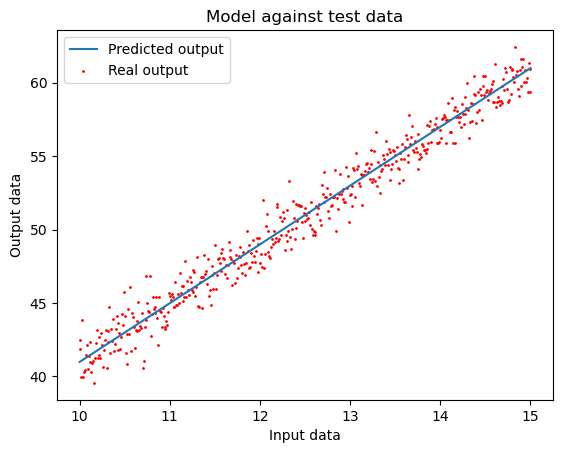

In [129]:
# test the model on the test data with the calculated coef
a, b = coef
y_test_pred = a * x_test + b

plt.plot(x_test, y_test_pred, label='Predicted output')
plt.scatter(x_test, y_test_noise, c='r', s=1, label='Real output')
plt.xlabel('Input data')
plt.ylabel('Output data')
plt.title('Model against test data')
plt.legend()
plt.show()

In order to score the model, we will implement $R^2$ score.

The $R^2$ score, also known as the **coefficient of determination**, is a statistical measure that evaluates how well a regression model fits the data. It is commonly used to assess the performance of [[linear regression]] models and provides insight into how much of the variance in the dependent variable ( $y$ ) is explained by the independent variable(s) ( $x$ ).

### Formula for $R^2$:

$$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$
Where:

- $y_i$​: The actual value of the dependent variable.
- $\hat{y}_i$​: The predicted value from the model.
- $\bar{y}$​: The mean of the actual values.
- The numerator $\sum (y_i - \hat{y}_i)^2$ represents the **Residual Sum of Squares (RSS)**, which is the total error or difference between actual and predicted values.
- The denominator $\sum (y_i - \bar{y})^2$ represents the **Total Sum of Squares (TSS)**, which is the total variance of the actual values.

In [130]:
def r_2_score(y_real, y_pred):
    return 1 - np.sum((y_real - y_pred) ** 2) / np.sum((y_real - y_real.mean()) ** 2)

In [131]:
print(r_2_score(y_test, y_test_pred))

0.9999969018429739


In [132]:
print(r_2_score(y_noise, y_pred))

0.9925372375458755


Now we compare to the LinearRegression of scikit learn

In [133]:
one_feature_linear = LinearRegression()

In [134]:
x_reshaped = x.reshape(-1, 1)
y_resahped = y_noise.reshape(-1, 1)

In [135]:
one_feature_linear.fit(x_reshaped, y_resahped)

LinearRegression()

In [136]:
# check out the 'a' coefficient
one_feature_linear.coef_

array([[4.00136953]])

In [137]:
# check out the interceptor
one_feature_linear.intercept_

array([0.97188287])

In [138]:
# check out the score on test data
x_test_reshape = x_test.reshape(-1, 1)

In [139]:
model_pred = one_feature_linear.predict(x_test_reshape)

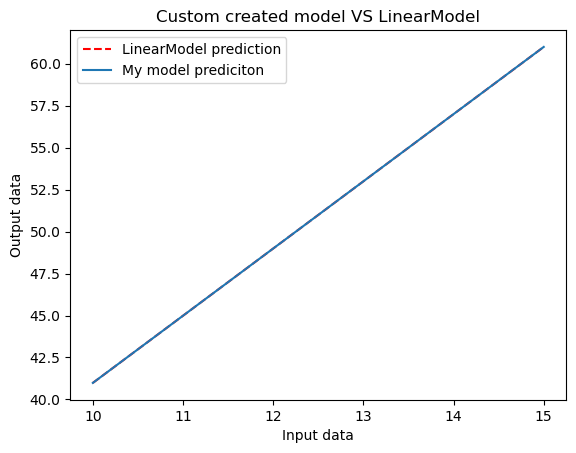

In [140]:
plt.plot(x_test_reshape, model_pred, c='r', label='LinearModel prediction', linestyle='--')
plt.plot(x_test, y_test_pred, label='My model prediciton')
plt.xlabel('Input data')
plt.ylabel('Output data')
plt.title('Custom created model VS LinearModel')
plt.legend()
plt.show()

Plotting the data we see perfect match. Now we will try **multifeature linear regression**. The equation is $$y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$ 
Where:

- $x_1, x_2, \dots, x_n$ are the input features.
- $w_1, w_2, \dots, w_n$​ are the coefficients (slopes) for each feature.

In [263]:
# defining the features
def generate_features(number=1, random_range=(-15, 15), points=1000):
    return np.array([np.linspace(np.random.randint(*random_range), np.random.randint(*random_range), points) for _ in
                     range(number)])


def generate_slopes(number=1, random_range=(-15, 15)):
    return [np.random.randint(*random_range) for _ in range(number)]


def calculate_real_output(features, slopes, interceptor):
    # Initialize an array for the sum of features multiplied by their slopes
    result_sum = np.zeros(features.shape[1])  # Shape matches the number of points in the features

    # Multiply each feature by its corresponding slope and sum
    for i in range(len(features)):
        result_sum += features[i] * slopes[i]  # Correctly multiply and sum the features and slopes

    # Generate random noise
    eps = np.random.randn(len(result_sum))

    # # Add the intercept term and noice
    return result_sum + interceptor + eps

In [264]:
features = generate_features(number=5)
slopes = generate_slopes(number=len(features))
interceptor = 2
y_real = calculate_real_output(features, slopes, interceptor)

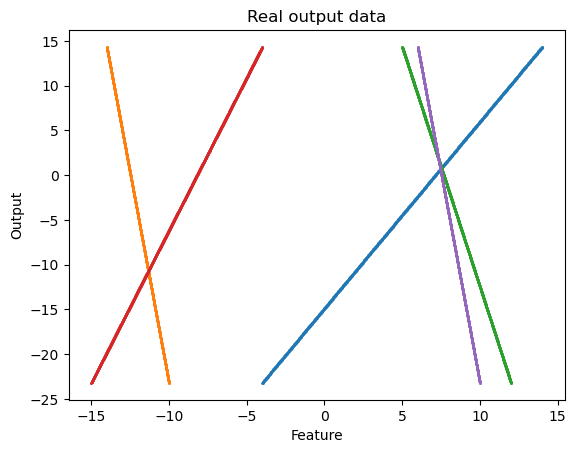

In [265]:
for i in range(len(features)):
    plt.scatter(features[i], y_pred, s=1)
plt.title('Real output data')
plt.xlabel('Feature')
plt.ylabel('Output')
plt.show()

In [266]:
class CustomLinearRegression:
    def __init__(self):
        self._coef = None  # Internal attribute to store the coefficients
        self._intercept = None
        self.__target = None
       
    @property
    def intercept_(self):
        return self._intercept
    
    @intercept_.setter
    def intercept_(self, value):
        if value is not None:
            self._intercept = value  # Update the internal attribute
    
    @property
    def coef_(self):
        """Getter for coef_"""
        return self._coef

    @coef_.setter
    def coef_(self, value):
        """Setter for coef_"""
        if value is not None:
            self._coef = value  # Update the internal attribute
            
    def predict(self, features):
        """Make predictions using the learned coefficients and intercept."""
        return np.dot(np.array(self.coef_), features) + self.intercept_

    def score(self, features, y_real):
        """Calculate the R-squared score."""
        y_pred = self.predict(features)
        return 1 - np.sum((y_real - y_pred) ** 2) / np.sum((y_real - y_real.mean()) ** 2)

    def fit(self, features, target, alpha=0.01, iterations=1000, random_state=None):
        """Perform fit with gradient descent."""
    
        # Set the random seed for reproducibility
        if random_state is not None:
            np.random.seed(random_state)
    
        # Initialize slopes and intercept
        slopes = np.random.uniform(-1, 1, size=len(features))  # Use smaller random initialization
        interceptor = 0  # Fixed interceptor
    
        # Perform gradient descent for the specified number of iterations
        for _ in range(iterations):
            slopes, interceptor = self._gradient_descent(features, target, slopes, interceptor, alpha)
    
        # Store the learned coefficients and intercept
        self.coef_ = slopes
        self.intercept_ = interceptor
        self.__target = target
    
        # Return self for method chaining (similar to scikit-learn's API)
        return self

    def _parameter_gradient(self, features, target, slopes, interceptor):
        """Compute gradients for the parameters using Mean Squared Error (MSE)."""

        # Calculate the predicted values (linear combination) just once
        predictions = self._linear_combination(features, slopes, interceptor)
        
        # Calculate the residuals (errors between the target and predictions)
        residuals = target - predictions
    
        # Calculate the gradients for the slopes (one per feature) using vectorized operations
        gradients = -2 / len(target) * np.dot(features, residuals)
        
        # Calculate the gradient for the intercept (bias term)
        interceptor_gradient = -2 / len(target) * np.sum(residuals)
    
        return gradients, interceptor_gradient

    def _gradient_descent(self, features, target, slopes, interceptor, alpha):
        """Perform one step of gradient descent to update slopes and intercept."""
        
        # Get the gradients for slopes and intercept
        gradients, interceptor_gradient = self._parameter_gradient(features, target, slopes, interceptor)
    
        # Update slopes using vectorized operations
        slopes_new = np.array(slopes) - alpha * gradients
        
        # Update intercept
        interceptor_new = interceptor - alpha * interceptor_gradient
    
        return slopes_new, interceptor_new  

    def _generate_slopes(self, number, random_range=(-1, 1)):
        # generates initial slopes and are in range (-1; 1)
        return [np.random.randint(*random_range) for _ in range(number)]

    def _linear_combination(self, features, slopes, interceptor):
        """Compute the linear combination of features and slopes with intercept."""
        # Use np.dot to compute the dot product between slopes and features
        result_sum = np.dot(slopes, features)
    
        # Add the intercept term to each prediction
        return result_sum + interceptor

In [267]:
custom_model = CustomLinearRegression()

In [283]:
custom_model.fit(features, y_real, alpha=0.001, iterations=10)

In [284]:
custom_model.coef_

array([  6.74236331, -10.11885785,   3.74654216,  -4.06997093,
         5.31669495])

In [285]:
custom_model.intercept_

0.688015639825448

In [287]:
custom_model.score(features, y_real)

0.6979001880918816

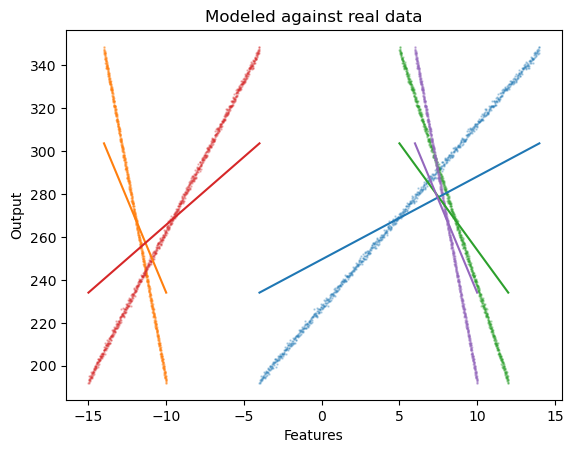

In [288]:
y_pred = custom_model.predict(features)
for i in range(len(features)):
    plt.plot(features[i], y_pred)
    plt.scatter(features[i], y_real, s=0.5, alpha=0.3)
plt.title('Modeled against real data')
plt.xlabel('Features')
plt.ylabel('Output')
plt.show()

Clearly visible that despite of the coef and interceptor being different from the original generated data's coeff, the model is accurate enough to match the data. The score is 99%.

In [193]:
slopes

[4, 1, 2]

In [194]:
interceptor

2

In [195]:
# comparing to LinearRegression
multi_model = LinearRegression()

In [196]:
multi_model.fit(features.T, y_real)

LinearRegression()

In [197]:
multi_model.coef_

array([ 3.40814245, -0.42601781,  2.55610684])

In [198]:
multi_model.intercept_

-5.608679664308052

In [199]:
multi_model.score(features.T, y_real)

0.9934582515061355